# 1. load data

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
folder_name = "./dataset/cifar-10-batches-py/"
result_folder = "./result_dataset/"
def unpickle(file):
    import cPickle
    with open(file, 'rb') as fo:
        dict = cPickle.load(fo)
    return dict

def dense_to_one_hot(labels_dense, num_classes=10):
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

def get_data_set(name="train"):
    import pickle
    x = None
    y = None


    if name is "train":
        for i in range(5):
            f = open(folder_name+'/data_batch_' + str(i + 1), 'rb')
            datadict = pickle.load(f)
            f.close()

            _X = datadict["data"]
            _Y = datadict['labels']

            _X = np.array(_X, dtype=float) / 255.0
            _X = _X.reshape([-1, 3, 32, 32])
            _X = _X.transpose([0, 2, 3, 1])
            _X = _X.reshape(-1, 32*32*3)

            if x is None:
                x = _X
                y = _Y
            else:
                x = np.concatenate((x, _X), axis=0)
                y = np.concatenate((y, _Y), axis=0)

    elif name is "test":
        f = open(folder_name+'/test_batch', 'rb')
        datadict = pickle.load(f)
        f.close()

        x = datadict["data"]
        y = np.array(datadict['labels'])

        x = np.array(x, dtype=float) / 255.0
        x = x.reshape([-1, 3, 32, 32])
        x = x.transpose([0, 2, 3, 1])
        x = x.reshape(-1, 32*32*3)

    return x, dense_to_one_hot(y)




In [3]:
def show_img(img):
    plt.imshow(img)
    plt.show()


def model():
    '''
    basic3x3
    '''
    _IMAGE_SIZE = 32
    _IMAGE_CHANNELS = 3
    _NUM_CLASSES = 10

    with tf.name_scope('main_params'):
        x = tf.placeholder(tf.float32, shape=[None, _IMAGE_SIZE * _IMAGE_SIZE * _IMAGE_CHANNELS], name='Input')
        y = tf.placeholder(tf.float32, shape=[None, _NUM_CLASSES], name='Output')
        x_image = tf.reshape(x, [-1, _IMAGE_SIZE, _IMAGE_SIZE, _IMAGE_CHANNELS], name='images')
        global_step = tf.Variable(initial_value=0, trainable=False, name='global_step')
        learning_rate = tf.placeholder(tf.float32, shape=[], name='learning_rate')

    with tf.variable_scope('conv1') as scope:
        conv = tf.layers.conv2d(
            inputs=x_image,
            filters=32,
            kernel_size=[3, 3],
            padding='SAME',
            activation=tf.nn.relu
        )
        conv = tf.layers.conv2d(
            inputs=conv,
            filters=64,
            kernel_size=[3, 3],
            padding='SAME',
            activation=tf.nn.relu
        )
        pool = tf.layers.max_pooling2d(conv, pool_size=[2, 2], strides=2, padding='SAME')
        drop = tf.layers.dropout(pool, rate=0.25, name=scope.name)

    with tf.variable_scope('conv2') as scope:
        conv = tf.layers.conv2d(
            inputs=drop,
            filters=128,
            kernel_size=[3, 3],
            padding='SAME',
            activation=tf.nn.relu
        )
        pool = tf.layers.max_pooling2d(conv, pool_size=[2, 2], strides=2, padding='SAME')
        conv = tf.layers.conv2d(
            inputs=pool,
            filters=128,
            kernel_size=[2, 2],
            padding='SAME',
            activation=tf.nn.relu
        )
        pool = tf.layers.max_pooling2d(conv, pool_size=[2, 2], strides=2, padding='SAME')
        drop = tf.layers.dropout(pool, rate=0.25, name=scope.name)

    with tf.variable_scope('fully_connected') as scope:
        flat = tf.reshape(drop, [-1, 4 * 4 * 128])

        fc = tf.layers.dense(inputs=flat, units=1500, activation=tf.nn.relu)
        drop = tf.layers.dropout(fc, rate=0.5)
        softmax = tf.layers.dense(inputs=drop, units=_NUM_CLASSES, activation=tf.nn.softmax, name=scope.name)

    y_pred_cls = tf.argmax(softmax, axis=1)
    
    return x, y, softmax, y_pred_cls, global_step, learning_rate
    
    

def model1():
    '''
    basic5x5
    '''
    _IMAGE_SIZE = 32
    _IMAGE_CHANNELS = 3
    _NUM_CLASSES = 10

    with tf.name_scope('main_params'):
        x = tf.placeholder(tf.float32, shape=[None, _IMAGE_SIZE * _IMAGE_SIZE * _IMAGE_CHANNELS], name='Input')
        y = tf.placeholder(tf.float32, shape=[None, _NUM_CLASSES], name='Output')
        x_image = tf.reshape(x, [-1, _IMAGE_SIZE, _IMAGE_SIZE, _IMAGE_CHANNELS], name='images')
        global_step = tf.Variable(initial_value=0, trainable=False, name='global_step')
        learning_rate = tf.placeholder(tf.float32, shape=[], name='learning_rate')

    with tf.variable_scope('conv1') as scope:
        conv = tf.layers.conv2d(
            inputs=x_image,
            filters=32,
            kernel_size=[5, 5],
            padding='SAME',
            activation=tf.nn.relu
        )
        conv = tf.layers.conv2d(
            inputs=conv,
            filters=64,
            kernel_size=[5, 5],
            padding='SAME',
            activation=tf.nn.relu
        )
        pool = tf.layers.max_pooling2d(conv, pool_size=[2, 2], strides=2, padding='SAME')
        drop = tf.layers.dropout(pool, rate=0.25, name=scope.name)

    with tf.variable_scope('conv2') as scope:
        conv = tf.layers.conv2d(
            inputs=drop,
            filters=128,
            kernel_size=[5, 5],
            padding='SAME',
            activation=tf.nn.relu
        )
        pool = tf.layers.max_pooling2d(conv, pool_size=[2, 2], strides=2, padding='SAME')
        conv = tf.layers.conv2d(
            inputs=pool,
            filters=128,
            kernel_size=[2, 2],
            padding='SAME',
            activation=tf.nn.relu
        )
        pool = tf.layers.max_pooling2d(conv, pool_size=[2, 2], strides=2, padding='SAME')
        drop = tf.layers.dropout(pool, rate=0.25, name=scope.name)

    with tf.variable_scope('fully_connected') as scope:
        flat = tf.reshape(drop, [-1, 4 * 4 * 128])

        fc = tf.layers.dense(inputs=flat, units=1500, activation=tf.nn.relu)
        drop = tf.layers.dropout(fc, rate=0.5)
        softmax = tf.layers.dense(inputs=drop, units=_NUM_CLASSES, activation=tf.nn.softmax, name=scope.name)

    y_pred_cls = tf.argmax(softmax, axis=1)
    
    return x, y, softmax, y_pred_cls, global_step, learning_rate
    
    

def model2():
    '''
    resnet
    '''
    _IMAGE_SIZE = 32
    _IMAGE_CHANNELS = 3
    _NUM_CLASSES = 10

    with tf.name_scope('main_params'):
        x = tf.placeholder(tf.float32, shape=[None, _IMAGE_SIZE * _IMAGE_SIZE * _IMAGE_CHANNELS], name='Input')
        y = tf.placeholder(tf.float32, shape=[None, _NUM_CLASSES], name='Output')
        x_image = tf.reshape(x, [-1, _IMAGE_SIZE, _IMAGE_SIZE, _IMAGE_CHANNELS], name='images')
        global_step = tf.Variable(initial_value=0, trainable=False, name='global_step')
        learning_rate = tf.placeholder(tf.float32, shape=[], name='learning_rate')

    with tf.variable_scope('initconv') as scope:
        conv = tf.layers.conv2d(
            inputs=x_image,
            filters=64,
            kernel_size=[3, 3],
            padding='SAME',
            activation=tf.nn.relu
        )
        
        net = tf.layers.batch_normalization(conv)
    
    with tf.variable_scope('res1') as scope:
        net_copy = net
        for i in range(2):
    
            #net_copy = tf.layers.conv2d(inputs=net_copy,filters=16,kernel_size[3,3],padding="same",activation=tf.nn.relu)
            net_copy = tf.layers.conv2d(inputs=net_copy,filters=64,kernel_size=[3, 3],padding='SAME',activation=tf.nn.relu)
        net_copy = tf.layers.batch_normalization(net_copy)
    
        net = tf.add(net,net_copy)
    
        pool = tf.layers.max_pooling2d(net, pool_size=[2, 2], strides=2, padding='SAME')
        net = tf.layers.dropout(pool, rate=0.25, name=scope.name)

    print(net.get_shape().as_list)
    
    with tf.variable_scope('res2') as scope:
        net_copy = net
        for i in range(2):
    
            net_copy = tf.layers.conv2d(inputs=net_copy,filters=64,kernel_size=[3, 3],padding='SAME',activation=tf.nn.relu)
        net_copy = tf.layers.batch_normalization(net_copy)
    
        net = tf.add(net,net_copy)
    
        pool = tf.layers.max_pooling2d(net, pool_size=[2, 2], strides=2, padding='SAME')
        net = tf.layers.dropout(pool, rate=0.25, name=scope.name)

    print(net.get_shape().as_list)
    
    with tf.variable_scope('res3') as scope:
        net_copy = net
        for i in range(2):
    
            net_copy = tf.layers.conv2d(inputs=net_copy,filters=64,kernel_size=[3, 3],padding='SAME',activation=tf.nn.relu)
        net_copy = tf.layers.batch_normalization(net_copy)
    
        net = tf.add(net,net_copy)
    
        pool = tf.layers.max_pooling2d(net, pool_size=[2, 2], strides=2, padding='SAME')
        net = tf.layers.dropout(pool, rate=0.25, name=scope.name)

    print(net.get_shape().as_list)
    
    
    with tf.variable_scope('fully_connected') as scope:
        flat = tf.reshape(net, [-1, 4 * 4 * 64])

        fc = tf.layers.dense(inputs=flat, units=1500, activation=tf.nn.relu)
        drop = tf.layers.dropout(fc, rate=0.5)
        softmax = tf.layers.dense(inputs=drop, units=_NUM_CLASSES, activation=tf.nn.softmax, name=scope.name)

    y_pred_cls = tf.argmax(softmax, axis=1)
    
   
    return x, y, softmax, y_pred_cls, global_step, learning_rate
   
    

In [4]:
def model3():
    '''
    dense net
    '''
    _IMAGE_SIZE = 32
    _IMAGE_CHANNELS = 3
    _NUM_CLASSES = 10

    with tf.name_scope('main_params'):
        x = tf.placeholder(tf.float32, shape=[None, _IMAGE_SIZE * _IMAGE_SIZE * _IMAGE_CHANNELS], name='Input')
        y = tf.placeholder(tf.float32, shape=[None, _NUM_CLASSES], name='Output')
        x_image = tf.reshape(x, [-1, _IMAGE_SIZE, _IMAGE_SIZE, _IMAGE_CHANNELS], name='images')
        global_step = tf.Variable(initial_value=0, trainable=False, name='global_step')
        learning_rate = tf.placeholder(tf.float32, shape=[], name='learning_rate')

    with tf.variable_scope('initconv') as scope:
        conv = tf.layers.conv2d(
            inputs=x_image,
            filters=16,
            kernel_size=[3, 3],
            padding='SAME',
            activation=tf.nn.relu
        )
        
        net = tf.layers.batch_normalization(conv)
    
    print(net.get_shape().as_list())#32x32x16
    
    with tf.variable_scope('den1') as scope:
        for i in range(2):
            net_copy = net
            net_copy = tf.layers.conv2d(inputs=net_copy,filters=16,kernel_size=[3, 3],padding='SAME',activation=tf.nn.relu)
            net = tf.concat([net,net_copy],3)
        
        net = tf.layers.batch_normalization(net)
    
        
        pool = tf.layers.max_pooling2d(net, pool_size=[2, 2], strides=2, padding='SAME')
        net = tf.layers.dropout(pool, rate=0.25, name=scope.name)

    
    
    print(net.get_shape().as_list())#16x16x48
    with tf.variable_scope('den2') as scope:
        
        for i in range(2):
            net_copy = net
            net_copy = tf.layers.conv2d(inputs=net_copy,filters=16,kernel_size=[3, 3],padding='SAME',activation=tf.nn.relu)
            net = tf.concat([net,net_copy],3)
        
        net_copy = tf.layers.batch_normalization(net)
    
       
        pool = tf.layers.max_pooling2d(net, pool_size=[2, 2], strides=2, padding='SAME')
        net = tf.layers.dropout(pool, rate=0.25, name=scope.name)

    #8x8x80
    
    print(net.get_shape().as_list())
    with tf.variable_scope('den3') as scope:
        net_copy = net
        for i in range(2):
    
            net_copy = net
            net_copy = tf.layers.conv2d(inputs=net_copy,filters=16,kernel_size=[3, 3],padding='SAME',activation=tf.nn.relu)
            net = tf.concat([net,net_copy],3)
        
        net_copy = tf.layers.batch_normalization(net)
    
        
        pool = tf.layers.max_pooling2d(net, pool_size=[2, 2], strides=2, padding='SAME')
        net = tf.layers.dropout(pool, rate=0.25, name=scope.name)

    #4x4x112
    print(net.get_shape().as_list())
    
    with tf.variable_scope('fully_connected') as scope:
        flat = tf.reshape(net, [-1, 4*4*112])

        fc = tf.layers.dense(inputs=flat, units=1500, activation=tf.nn.relu)
        drop = tf.layers.dropout(fc, rate=0.5)
        softmax = tf.layers.dense(inputs=drop, units=_NUM_CLASSES, activation=tf.nn.softmax, name=scope.name)

    y_pred_cls = tf.argmax(softmax, axis=1)
    
   
    return x, y, softmax, y_pred_cls, global_step, learning_rate
   
    

In [5]:
train_x, train_y = get_data_set("train")
test_x, test_y = get_data_set("test")

In [6]:
x, y, output, y_pred_cls, global_step, learning_rate = model3()
global_accuracy = 0

[None, 32, 32, 16]
[None, 16, 16, 48]
[None, 8, 8, 80]
[None, 4, 4, 112]


(50000, 3072)


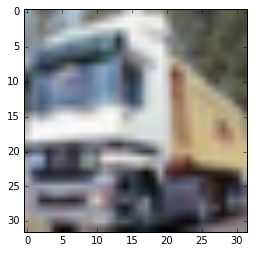

In [7]:
print(train_x.shape)
show_img(train_x[1].reshape(32,32,3))

In [8]:
# PARAMS
_BATCH_SIZE = 128
_EPOCH = 10
_SAVE_PATH = "./result_dataset/"

In [9]:
# LOSS AND OPTIMIZER
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=y))

In [10]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate,
                                   beta1=0.9,
                                   beta2=0.999,
                                   epsilon=1e-08).minimize(loss, global_step=global_step)

In [11]:
correct_prediction = tf.equal(y_pred_cls, tf.argmax(y, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [12]:
# SAVER
merged = tf.summary.merge_all()
saver = tf.train.Saver()
sess = tf.Session()
train_writer = tf.summary.FileWriter(_SAVE_PATH, sess.graph)

In [13]:
def test_and_save(_global_step, epoch):
    global global_accuracy

    i = 0
    predicted_class = np.zeros(shape=len(test_x), dtype=np.int)
    while i < len(test_x):
        j = min(i + _BATCH_SIZE, len(test_x))
        batch_xs = test_x[i:j, :]
        batch_ys = test_y[i:j, :]
        predicted_class[i:j],cost = sess.run(
            [y_pred_cls,loss],
            feed_dict={x: batch_xs, y: batch_ys, learning_rate: lr(epoch)}
        )
        i = j
   
    correct = (np.argmax(test_y, axis=1) == predicted_class)
    acc = correct.mean()*100
    correct_numbers = correct.sum()

    mes = "\nEpoch {} - accuracy: {:.2f}% ({}/{}),loss{:.4f}"
    print(mes.format((epoch+1), acc, correct_numbers, len(test_x),cost))

    if global_accuracy != 0 and global_accuracy < acc:

        summary = tf.Summary(value=[
            tf.Summary.Value(tag="Accuracy/test", simple_value=acc),
        ])
        train_writer.add_summary(summary, _global_step)

        saver.save(sess, save_path=_SAVE_PATH, global_step=_global_step)

        mes = "This epoch receive better accuracy: {:.2f} > {:.2f}. Saving session..."
        print(mes.format(acc, global_accuracy))
        global_accuracy = acc

    elif global_accuracy == 0:
        global_accuracy = acc

    print("###########################################################################################################")
    

In [17]:

def train(epoch,file_name="result"):
    f = open(result_folder+file_name,'a')
    batch_size = int(math.ceil(len(train_x) / _BATCH_SIZE))
    i_global = 0
    
    for s in range(batch_size):
        batch_xs = train_x[s*_BATCH_SIZE: (s+1)*_BATCH_SIZE]
        batch_ys = train_y[s*_BATCH_SIZE: (s+1)*_BATCH_SIZE]

        start_time = time()
        
        i_global, _, batch_loss, batch_acc = sess.run(
            [global_step, optimizer, loss, accuracy],
            feed_dict={x: batch_xs, y: batch_ys, learning_rate: lr(epoch)})
        duration = time() - start_time

        if s % 10 == 0:
            percentage = int(round((s/batch_size)*100))

            bar_len = 29
            filled_len = int((bar_len*int(percentage))/100)
            bar = '=' * filled_len + '>' + '-' * (bar_len - filled_len)

            msg = "Global step: {:>5} - [{}] {:>3}% - acc: {:.4f} - loss: {:.4f} - {:.1f} sample/sec"
            print(msg.format(i_global, bar, percentage, batch_acc, batch_loss, _BATCH_SIZE / duration))
            
            
            f.write(str(loss)+'\n')
    test_and_save(i_global, epoch)
    

In [19]:
import math
from time import time
def lr(epoch):
    learning_rate = 1e-3
    if epoch > 80:
        learning_rate *= 0.5e-3
    elif epoch > 60:
        learning_rate *= 1e-3
    elif epoch > 40:
        learning_rate *= 1e-2
    elif epoch > 20:
        learning_rate *= 1e-1
    return learning_rate
def main():
    sess.run(tf.global_variables_initializer())
    for i in range(_EPOCH):

        print("\nEpoch: {0}/{1}\n".format((i+1), _EPOCH))

        train(i)


In [ ]:
main()



Epoch: 1/10

Global step:     1 - [>-----------------------------]   0% - acc: 0.1016 - loss: 2.3046 - 5841.3 sample/sec
Global step:    11 - [>-----------------------------]   0% - acc: 0.1250 - loss: 2.3127 - 6406.7 sample/sec
Global step:    21 - [>-----------------------------]   0% - acc: 0.1875 - loss: 2.2886 - 6683.4 sample/sec
Global step:    31 - [>-----------------------------]   0% - acc: 0.1406 - loss: 2.2606 - 6635.9 sample/sec
Global step:    41 - [>-----------------------------]   0% - acc: 0.2266 - loss: 2.2299 - 6546.6 sample/sec
Global step:    51 - [>-----------------------------]   0% - acc: 0.2734 - loss: 2.1498 - 6732.6 sample/sec
Global step:    61 - [>-----------------------------]   0% - acc: 0.3203 - loss: 2.1326 - 6633.9 sample/sec
Global step:    71 - [>-----------------------------]   0% - acc: 0.2891 - loss: 2.1535 - 6718.1 sample/sec
Global step:    81 - [>-----------------------------]   0% - acc: 0.3516 - loss: 2.0974 - 6607.8 sample/sec
Global step:  


Epoch 3 - accuracy: 67.16% (6716/10000),loss1.8474
###########################################################################################################

Epoch: 4/10

Global step:  1171 - [>-----------------------------]   0% - acc: 0.7188 - loss: 1.7516 - 6856.9 sample/sec
Global step:  1181 - [>-----------------------------]   0% - acc: 0.6797 - loss: 1.7688 - 6808.2 sample/sec
Global step:  1191 - [>-----------------------------]   0% - acc: 0.7578 - loss: 1.6986 - 6824.9 sample/sec
Global step:  1201 - [>-----------------------------]   0% - acc: 0.6797 - loss: 1.7744 - 6788.6 sample/sec
Global step:  1211 - [>-----------------------------]   0% - acc: 0.6797 - loss: 1.7822 - 6714.9 sample/sec
Global step:  1221 - [>-----------------------------]   0% - acc: 0.7109 - loss: 1.7540 - 6732.9 sample/sec
Global step:  1231 - [>-----------------------------]   0% - acc: 0.6562 - loss: 1.7986 - 6724.8 sample/sec
Global step:  1241 - [>-----------------------------]   0% - acc: 0.64

Global step:  1911 - [>-----------------------------]   0% - acc: 0.6562 - loss: 1.8049 - 6744.6 sample/sec
Global step:  1921 - [>-----------------------------]   0% - acc: 0.7812 - loss: 1.6799 - 6660.8 sample/sec
Global step:  1931 - [>-----------------------------]   0% - acc: 0.7031 - loss: 1.7452 - 6657.6 sample/sec
Global step:  1941 - [>-----------------------------]   0% - acc: 0.6562 - loss: 1.8036 - 6482.7 sample/sec

Epoch 5 - accuracy: 69.92% (6992/10000),loss1.7714
This epoch receive better accuracy: 69.92 > 67.67. Saving session...
###########################################################################################################

Epoch: 6/10

Global step:  1951 - [>-----------------------------]   0% - acc: 0.7344 - loss: 1.7178 - 6703.7 sample/sec
Global step:  1961 - [>-----------------------------]   0% - acc: 0.7109 - loss: 1.7466 - 6752.2 sample/sec
Global step:  1971 - [>-----------------------------]   0% - acc: 0.8203 - loss: 1.6346 - 6785.4 sample/sec
G

Global step:  2631 - [>-----------------------------]   0% - acc: 0.7109 - loss: 1.7448 - 6758.5 sample/sec
Global step:  2641 - [>-----------------------------]   0% - acc: 0.7891 - loss: 1.6791 - 6768.2 sample/sec
Global step:  2651 - [>-----------------------------]   0% - acc: 0.6328 - loss: 1.8321 - 6787.2 sample/sec
Global step:  2661 - [>-----------------------------]   0% - acc: 0.6953 - loss: 1.7811 - 6801.3 sample/sec
Global step:  2671 - [>-----------------------------]   0% - acc: 0.7422 - loss: 1.7222 - 6730.1 sample/sec
Global step:  2681 - [>-----------------------------]   0% - acc: 0.7344 - loss: 1.7238 - 6811.4 sample/sec
Global step:  2691 - [>-----------------------------]   0% - acc: 0.7031 - loss: 1.7667 - 6831.0 sample/sec
Global step:  2701 - [>-----------------------------]   0% - acc: 0.7422 - loss: 1.7082 - 6737.9 sample/sec
Global step:  2711 - [>-----------------------------]   0% - acc: 0.7422 - loss: 1.7208 - 6761.0 sample/sec
Global step:  2721 - [>-----

Global step:  3351 - [>-----------------------------]   0% - acc: 0.7578 - loss: 1.6949 - 6821.6 sample/sec
Global step:  3361 - [>-----------------------------]   0% - acc: 0.7031 - loss: 1.7627 - 6618.7 sample/sec
Global step:  3371 - [>-----------------------------]   0% - acc: 0.7500 - loss: 1.7077 - 6711.8 sample/sec
Global step:  3381 - [>-----------------------------]   0% - acc: 0.7109 - loss: 1.7483 - 6672.9 sample/sec
Global step:  3391 - [>-----------------------------]   0% - acc: 0.6797 - loss: 1.7812 - 6792.9 sample/sec
Global step:  3401 - [>-----------------------------]   0% - acc: 0.7969 - loss: 1.6629 - 6718.9 sample/sec
Global step:  3411 - [>-----------------------------]   0% - acc: 0.7578 - loss: 1.6965 - 6780.4 sample/sec
Global step:  3421 - [>-----------------------------]   0% - acc: 0.8281 - loss: 1.6359 - 6627.0 sample/sec
Global step:  3431 - [>-----------------------------]   0% - acc: 0.6953 - loss: 1.7469 - 6711.8 sample/sec
Global step:  3441 - [>-----

In [23]:
from keras.preprocessing.image import ImageDataGenerator


/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [67]:
ImageDataGenerator

keras.preprocessing.image.ImageDataGenerator

In [68]:
datagen = ImageDataGenerator(rotation_range=20,horizontal_flip=True,width_shift_range=5,height_shift_range=5)

In [69]:
datagen.fit(train_x.reshape(-1,32,32,3))

('Epoch', 0)


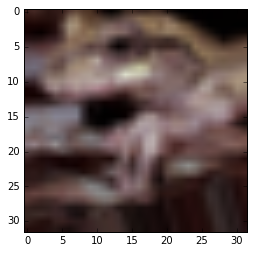

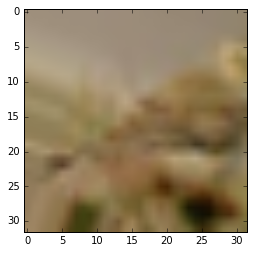

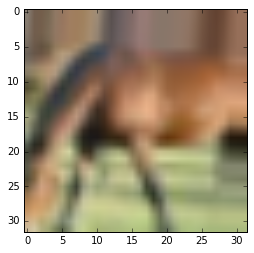

In [70]:
epochs=1
for e in range(epochs):
    print('Epoch', e)
    batches = 0
    for x_batch, y_batch in datagen.flow(train_x.reshape(-1,32,32,3), train_y, batch_size=32):
        show_img(x_batch[0])
        #model.fit(x_batch, y_batch)
        batches += 1
        if batches >= 3:#len(train_x) / 32*32*32:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break